In [1]:
import json
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [2]:
with open('nyt-2020-election-scraper/results.json') as f:
    data = json.load(f)

In [3]:
def plotData(stateNumber):
    # General Parameters
    stateName = data["data"]["races"][stateNumber]["state_name"]
    stateElecVote = data["data"]["races"][stateNumber]["electoral_votes"]
    stateTotCountVote = data["data"]["races"][stateNumber]["votes"]
    timeArrayLength = len(data["data"]["races"][stateNumber]["timeseries"])
    time = range(0,timeArrayLength)


    bidenCountTimeSeries = []
    trumpCountTimeSeries = []
    timeLabelTimeSeries = []
    netTotalVote = []
    prevTotalVote = 0

    marginTrump = []
    marginBiden = []

    for i in range(0,timeArrayLength):

        currTotalVote = float(data["data"]["races"][stateNumber]["timeseries"][i]["votes"])
        bidenVoteShare = float(data["data"]["races"][stateNumber]["timeseries"][i]["vote_shares"]["bidenj"])
        trumpVoteShare = float(data["data"]["races"][stateNumber]["timeseries"][i]["vote_shares"]["trumpd"])
        timeLabel =  data["data"]["races"][stateNumber]["timeseries"][i]["timestamp"]

        #for figure 1
        bidenCount = bidenVoteShare * currTotalVote
        trumpCount = trumpVoteShare * currTotalVote

        bidenCountTimeSeries.append(bidenCount)
        trumpCountTimeSeries.append(trumpCount)
        timeLabelTimeSeries.append(timeLabel)
        netTotalVote.append(currTotalVote-prevTotalVote)
        prevTotalVote = currTotalVote


        #for figure 2
        marginTrump.append(trumpCount - bidenCount) 
        marginBiden.append(bidenCount - trumpCount)



    plt.style.use('fivethirtyeight')
    fig, ax = plt.subplots(2,2, figsize=([45,30]))

    ax[0,0].plot(time,bidenCountTimeSeries, 'b',lw=12,label= "Biden")
    ax[0,0].plot(time,trumpCountTimeSeries, 'r',lw=12,label="Trump")
    ax[0,0].plot(time, netTotalVote, lw=12,label="Votes Counted")
    ax[0,0].set_title(r"$\bf{" + stateName + "}$" +' Current Total Votes with ' + str(stateElecVote)+ ' Electoral Votes', fontsize = 38)
    ax[0,0].set_ylabel("Vote Counts",fontsize = 38)
    ax[0,0].set_xlabel("Number of Vote Releases Overtime", fontsize = 38)
    ax[0,0].tick_params(axis='both', which='major', labelsize=34)
    tx = ax[0,0].yaxis.get_offset_text()
    tx.set_fontsize(34)
    ax[0,0].legend(fontsize = 34)


    # Figure 2

    ax[0,1].plot(time,marginBiden, 'b',lw=12,label= "Biden")
    ax[0,1].plot(time,marginTrump, 'r',lw=12,label= "Trump")
    ax[0,1].set_title('Differential Votes Overtime', fontsize = 38)
    ax[0,1].set_ylabel("Vote Margin",fontsize = 38)
    ax[0,1].set_xlabel("Number of Vote Releases Overtime", fontsize = 38)
    ax[0,1].tick_params(axis='both', which='major', labelsize=34)
    tx = ax[0,1].yaxis.get_offset_text()
    tx.set_fontsize(34)
    ax[0,1].legend(fontsize = 34)


    # Figure 3
    # Biden or Trump are either first or second in the race, so this IF checks where each is place in json file
    if (data["data"]["races"][stateNumber]["candidates"][0]["candidate_key"] == "bidenj"):
        bidenVotePerc = round((100*float(data["data"]["races"][stateNumber]["candidates"][0]["votes"])/float(stateTotCountVote)),4)
        trumpVotePerc = round((100*float(data["data"]["races"][stateNumber]["candidates"][1]["votes"])/float(stateTotCountVote)),4)
    else:
        bidenVotePerc = round((100*float(data["data"]["races"][stateNumber]["candidates"][1]["votes"])/float(stateTotCountVote)),4)
        trumpVotePerc = round((100*float(data["data"]["races"][stateNumber]["candidates"][0]["votes"])/float(stateTotCountVote)),4)

    labels = ['Biden', "Trump", "Others"]
    colors = ['b','r','g']
    sizes = [bidenVotePerc, trumpVotePerc, 100-abs(trumpVotePerc + bidenVotePerc)]
    wedges, texts, autotexts = ax[1,0].pie(sizes, colors = colors, autopct='%1.2f%%', startangle=0, textprops = {"color":"w","fontweight":"bold","fontsize":35})
    ax[1,0].set_title("2020 Candidates' Vote Percentage for " + r"$\bf{" + stateName + "}$", fontsize = 38)
    ax[1,0].legend(wedges, labels, fontsize =34,loc="best")
    ax[1,0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


    # Figure 4

    years = ['2016', '2020']
    vote2016 = float(data["data"]["races"][stateNumber]["votes2016"])
    dem2016 = float(data["data"]["races"][stateNumber]["clinton2016"])
    gop2016 = float(data["data"]["races"][stateNumber]["trump2016"])
    dem2016VotePerc = 100 * (dem2016 / vote2016)
    gop2016VotePerc = 100* (gop2016 / vote2016)

    percDEM = np.array([dem2016VotePerc,bidenVotePerc])
    percOthers = np.array([100 - abs(gop2016VotePerc + dem2016VotePerc), 100 - abs(trumpVotePerc + bidenVotePerc)])
    percGOP = np.array([gop2016VotePerc,trumpVotePerc])
    ind = [x for x, _ in enumerate(years)]

    bar1= ax[1,1].bar(ind, percDEM, width=0.4, label='DEM', color='b', bottom=percOthers+percGOP)
    bar2= ax[1,1].bar(ind, percGOP, width=0.4, label='GOP', color='r', bottom=percOthers)
    bar3= ax[1,1].bar(ind, percOthers, width=0.4, label='Others', color='g')


    ax[1,1].set_xticks(ind)
    ax[1,1].set_xticklabels(years, rotation=0)
    ax[1,1].set_title('2016 VS 2020 for ' r"$\bf{" + stateName + "}$", fontsize = 38)
    ax[1,1].set_ylabel("Vote Percent [%]", fontsize = 38)
    ax[1,1].set_xlabel("Years", fontsize = 38)
    ax[1,1].tick_params(axis='both', which='major', labelsize=34)

    ax[1,1].legend(fontsize =34, loc="best")

    for r1, r2, r3 in zip(bar1, bar2, bar3):
        h1 = r1.get_height()
        h2 = r2.get_height()
        h3 = r3.get_height()
        ax[1,1].text(r1.get_x() + r1.get_width() / 2., h1/ 2. + h2  + h3 , str(round(h1,2)) + " %", ha="center", va="center", color="white", fontsize = 35, fontweight="bold")
        ax[1,1].text(r2.get_x() + r2.get_width() / 2., h2/2 + h3 , str(round(h2,2)) + " %", ha="center", va="center", color="white", fontsize=35, fontweight="bold")
        ax[1,1].text(r3.get_x() + r3.get_width() / 2., h3 /2  , str(round(h3,2)) + " %", ha="center", va="center", color="white", fontsize=35, fontweight="bold")

    #save image as png, ensure to create a folder called results
#     plt.savefig('results/US2020Election_' +stateName+'.png', dpi= 150)
    plt.show()

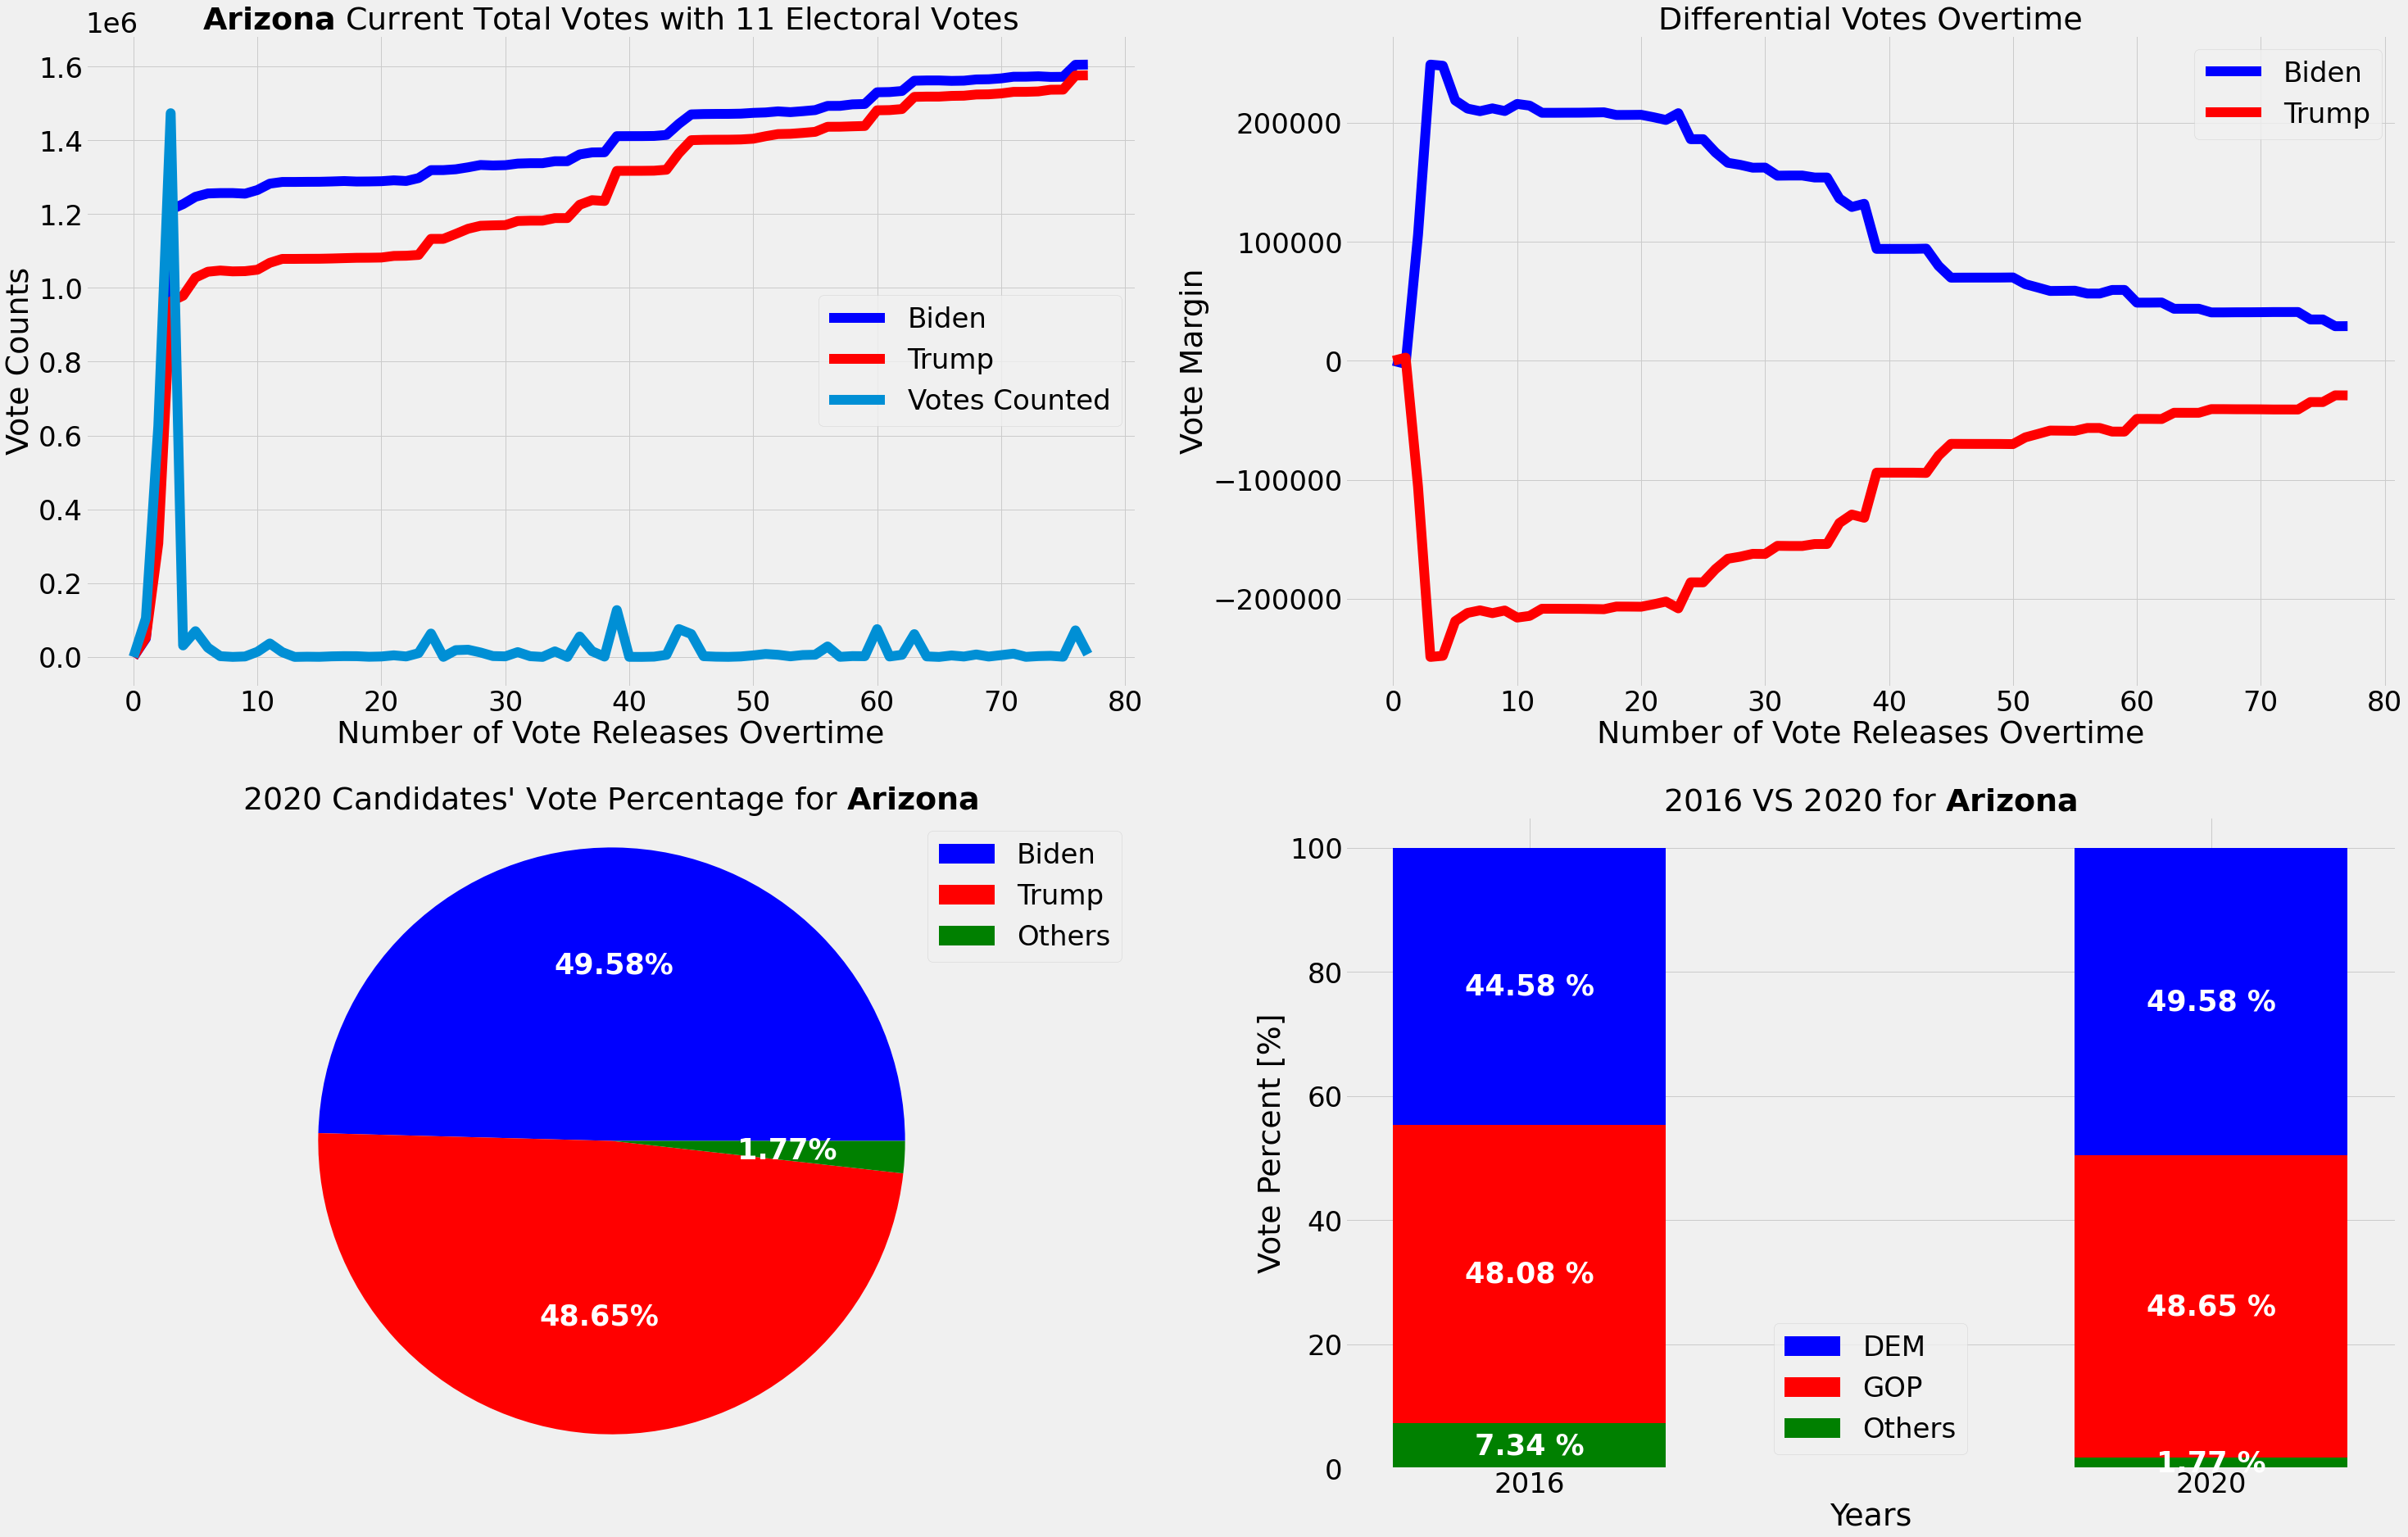

In [4]:
# User input
# choose between 0 to 50 for all the 51 states 
stateNumber = 3;
plotData(stateNumber)

# for all states, comment the above (add # in front) and uncomment the below lines
# for state in range(0,50):
#     plotData(state)